In [495]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import pickle as pkl
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [496]:
train_filepath = "train_workspace/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
dataList = ["Ohnologs","No-Ohnologs","Paralogs"]
dataNameList = ["ohnologs","no-ohnologs","paralog"]
sb.set_style("darkgrid")

In [497]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5529533983347074807
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 465436672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17260039064643385937
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [498]:
working_level = "Strict"

In [499]:
def get_df_dict(level):
    df_dict = {}    
    current_file_path = train_filepath + level + "/"
    for (dataName,data) in zip(dataNameList,dataList):                
        df_dict[data] = pd.read_pickle(current_file_path + dataName + "-complete2.pkl")        
    return df_dict

In [500]:
df_dict = get_df_dict(working_level)

In [501]:
df_dict["Paralogs"].isnull().values.any()

False

In [502]:
for dataName in dataList:
    df_dict[dataName].fillna(0,inplace=True)

In [503]:
print(df_dict["Ohnologs"].isnull().values.any())
print(df_dict["No-Ohnologs"].isnull().values.any())
print(df_dict["Paralogs"].isnull().values.any())

False
False
False


Text(0.5, 1.0, 'Ohnologs')

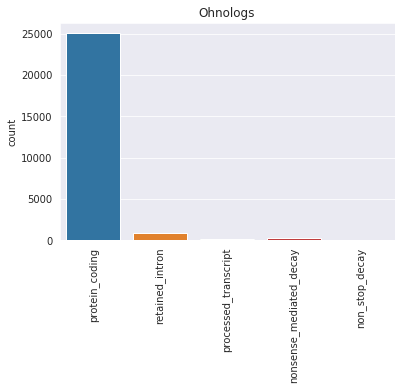

In [504]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [505]:
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Ohnologs')

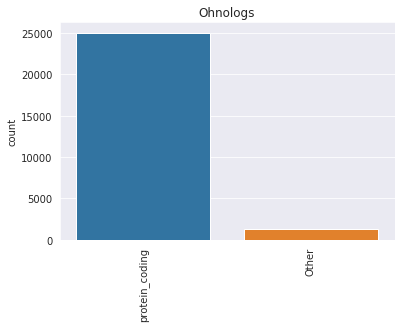

In [506]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [507]:
data = "No-Ohnologs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

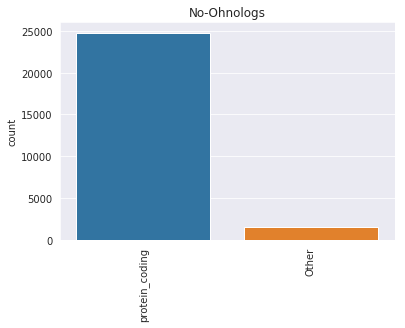

In [508]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [509]:
data = "Paralogs"
filter_ids_1 = df_dict[data]["Sequence-1-Transcript-Biotype"] != "protein_coding"
filter_ids_2 = df_dict[data]["Sequence-2-Transcript-Biotype"] != "protein_coding"

df_dict[data].loc[filter_ids_1,"Sequence-1-Transcript-Biotype"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Transcript-Biotype"] = "Other"

Text(0.5, 1.0, 'Paralogs')

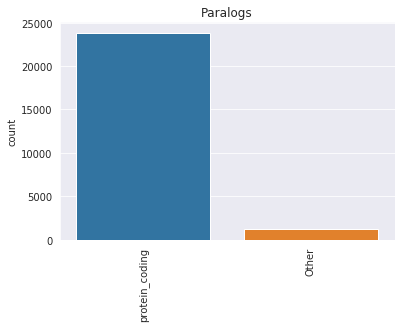

In [510]:
ser = df_dict[data]["Sequence-1-Transcript-Biotype"].append(df_dict[data]["Sequence-2-Transcript-Biotype"])
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)


Text(0.5, 1.0, 'Ohnologs')

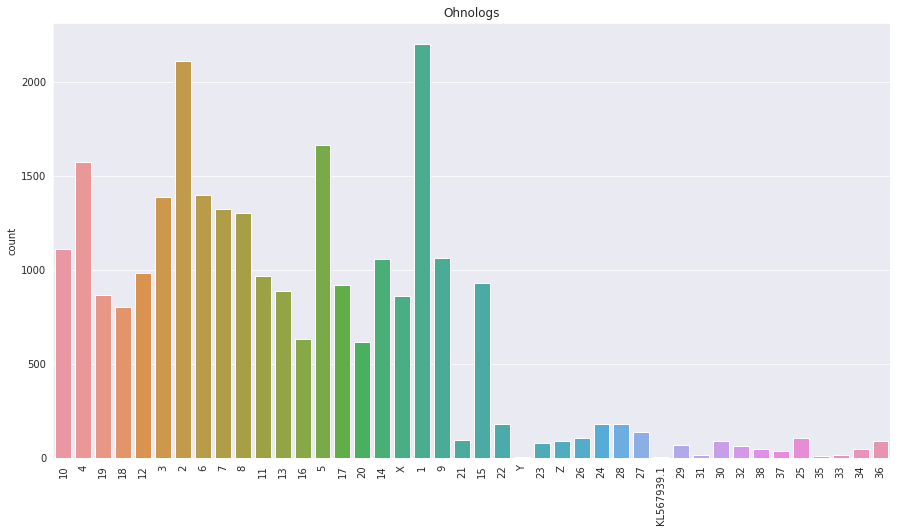

In [511]:
data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [512]:
ser.unique()
ser_filter = ser[ser != "KL567939.1"]
ser_filter = ser_filter[ser_filter != "AABR07024031.1"]

Text(0.5, 1.0, 'Ohnologs')

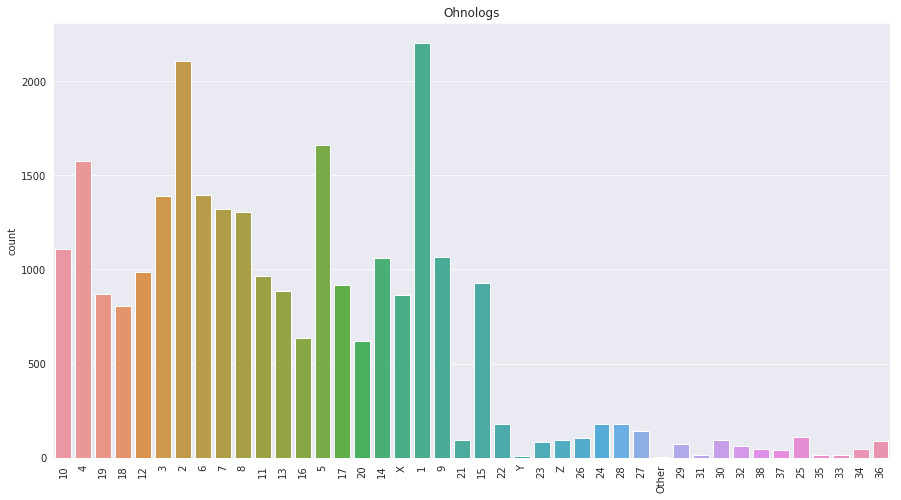

In [513]:
df_dict[data]["Sequence-1-Chromosome"].replace("KL567939.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("KL567939.1","Other",inplace=True)

df_dict[data]["Sequence-1-Chromosome"].replace("AABR07024031.1","Other",inplace=True)
df_dict[data]["Sequence-2-Chromosome"].replace("AABR07024031.1","Other",inplace=True)

data = "Ohnologs"
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(15,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [515]:
data = "No-Ohnologs"

In [516]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'No-Ohnologs')

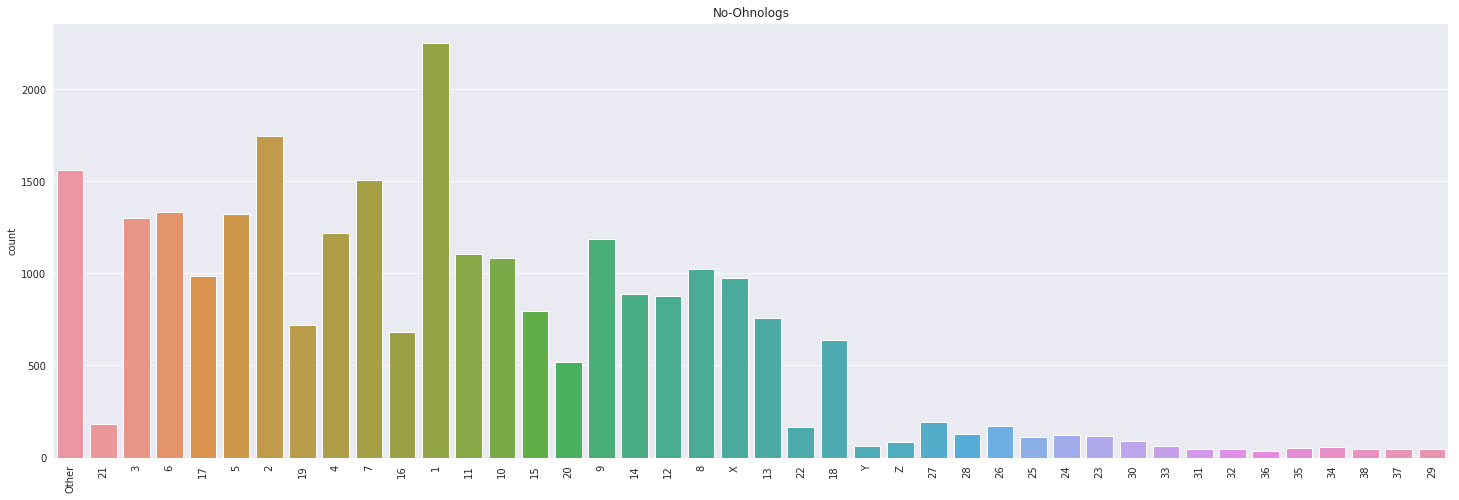

In [517]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(25,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [518]:
data = "Paralogs"

In [519]:
filter_ids_1 = ~df_dict[data]["Sequence-1-Chromosome"].isin(ser_filter.to_list())
filter_ids_2 = ~df_dict[data]["Sequence-2-Chromosome"].isin(ser_filter.to_list())

df_dict[data].loc[filter_ids_1,"Sequence-1-Chromosome"] = "Other"
df_dict[data].loc[filter_ids_2,"Sequence-2-Chromosome"] = "Other"

Text(0.5, 1.0, 'Paralogs')

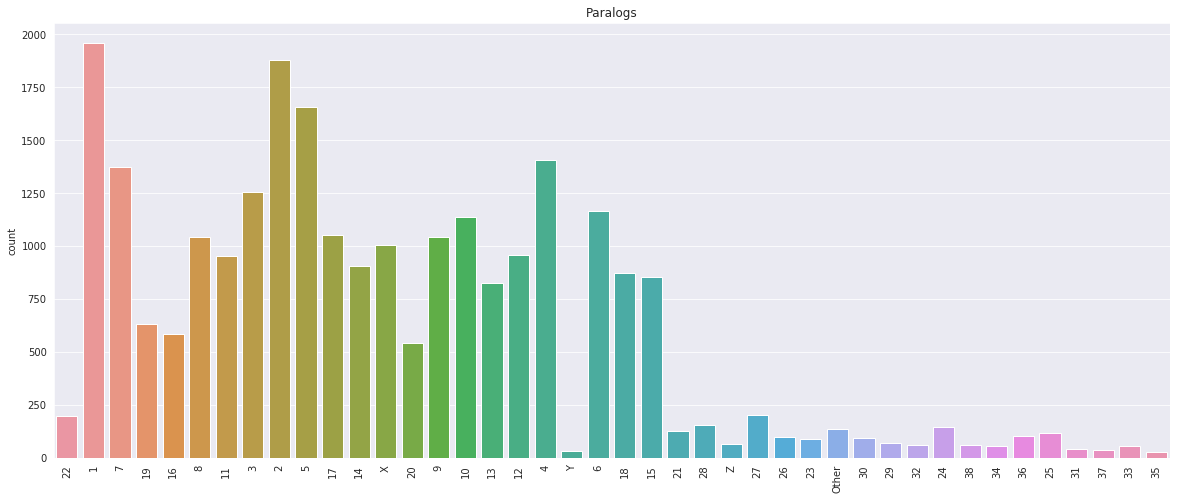

In [520]:
ser = df_dict[data]["Sequence-1-Chromosome"].append(df_dict[data]["Sequence-2-Chromosome"])
plt.figure(figsize=(20,8))
ax = sb.countplot(x=ser)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title(data)

In [521]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,protein_coding,Other,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,protein_coding,protein_coding,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,protein_coding,protein_coding,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,Human,7,1,protein_coding,Other,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,Human,7,1,protein_coding,Other,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8


In [522]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)

In [523]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,Human,7,1,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,Human,7,1,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0


In [524]:
df_dict["Ohnologs"] = pd.get_dummies(df_dict["Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=True)

In [525]:
pd.set_option("display.max_columns", None)
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0,1,0,0,0
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0,1,0,0,0
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0,1,0,0,0
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,7,1,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0,0,1,0,0,0
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,7,1,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0,0,1,0,0,0


In [526]:
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["No-Ohnologs"] = pd.get_dummies(df_dict["No-Ohnologs"] ,prefix=['Specie'],columns=['Species'], drop_first=True)

df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-1-Biotype'],columns=['Sequence-1-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Seq-2-Biotype'],columns=['Sequence-2-Transcript-Biotype'], drop_first=True)
df_dict["Paralogs"] = pd.get_dummies(df_dict["Paralogs"] ,prefix=['Specie'],columns=['Species'], drop_first=True)

In [527]:
def get_embeddings(kmer,kind):    
    df_emb = {}
    if(kind != ""):
        kind = "_" + kind   
    for data in dataList:
        df_emb[data] = []
        df_emb[data].append(pd.read_pickle(train_filepath + working_level + "/embeddings_dna2vec/" + str(kmer) + "kmer/" + data.lower() + "1-vec-"+ str(kmer) + "kmer" + kind + ".pkl"))
        df_emb[data].append(pd.read_pickle(train_filepath + working_level + "/embeddings_dna2vec/" + str(kmer) + "kmer/" + data.lower() + "2-vec-"+ str(kmer) + "kmer" + kind + ".pkl"))
    return df_emb
    
kmer_chosen = 8
type_chosen = "cdna"
df_emb_dict = get_embeddings(kmer_chosen,type_chosen)
df_emb_dict["Ohnologs"][0].head()

,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99
0,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.001671,55.356249,10.489772,6.756338,-13.414777,-31.564254,-2.423727,95.889064,-22.249666,-33.723598,-57.332966,-4.495406,91.367591,-43.725705,-11.502453,52.343955,70.735994,82.349639,-45.634225,-31.039460,-64.533723,-5.856059,91.297145,40.707912,-50.461167,7.542859,-64.714941,-103.317336,40.946048,-77.383320,-69.753901,103.836665,-27.859148,-69.168266,91.770998,38.245281,9.683196,-22.930974,5.264987,83.238508,91.595692,-1.977246,-50.829989,125.299464,64.307878,-73.393605,8.339377,-89.152087,42.932983,-12.137239,-5.514637,128.501242,-64.417645,9.823272,71.256874,-76.599455,-49.922305,-131.167268,0.953452,-139.972689,9.906091,-19.538984,-46.273159,-24.223038,19.992363,-70.487932,97.864675,12.051629,8.135908,1.786344,-7.259629,-17.358343,131.728883,-13.558293,-37.296131,72.019638,-28.980095
1,-237.003195,-109.504248,-59.596214,48.532449,-14.853425,-82.088126,124.858776,-158.704501,152.694694,57.568564,-74.531073,-32.655383,54.451352,-174.281023,-122.085922,-8.514483,37.412475,-147.082916,-170.186823,-182.222654,82.824787,70.615300,-55.284364,49.944443,84.532469,3.574156,47.676721,-16.482202,-28.201058,-34.219379,125.752828,-0.223234,-33.028033,-107.694406,-13.797543,175.447927,-57.217728,-3.703676,78.299034,94.044193,142.888383,-74.543307,-28.171149,-104.589640,-4.995633,143.516656,84.454851,-98.296404,-6.813374,-119.412021,-183.773241,68.176414,-130.927325,-113.902028,194.943233,-64.381863,-115.251972,165.876357,71.652163,-7.038342,-26.172958,2.138939,168.486954,168.699532,-0.003643,-95.383619,232.939077,110.532385,-124.050345,27.733773,-165.089786,75.173421,-17.518099,6.213082,215.277772,-100.492420,47.636796,138.076033,-156.871605,-83.887842,-222.314656,-9.282170,-217.529500,28.762455,1.470188,-49.835433,-21.625886,35.239763,-108.786908,179.678867,13.672027,26.094954,22.924771,-0.976092,-23.221465,229.584369,-9.392848,-59.037646,135.437552,-42.000545
2,-473.047814,-188.076269,-149.532138,81.917788,-87.964187,-118.308160,304.994440,-347.650331,373.321750,208.098100,-251.030153,-18.423463,55.766568,-391.609889,-168.713467,0.522103,155.493145,-475.706579,-272.380417,-495.180506,133.537622,56.008779,-141.950992,131.704770,193.108104,33.284122,30.822923,-54.441909,-43.881859,-40.728984,332.592876,-122.951090,28.255633,-266.160761,-20.233023,351.267548,-113.676948,35.495729,156.745311,116.293912,234.973367,-114.395888,-40.0

In [528]:
def get_cosine_similarity(dataName,emb_type,kmer):    
    return pd.read_pickle(train_filepath + working_level + "/cosine_similarity/" + dataName + "-" + type_chosen + "-" + str(kmer) + ".pkl")   
        

In [529]:
for dataName in dataList:    
    df_dict[dataName] = pd.concat([df_dict[dataName].reset_index(drop=True),get_cosine_similarity(dataName,type_chosen,kmer_chosen).reset_index(drop=True)],axis=1,sort=False)    

In [531]:
df_dict["Ohnologs"].head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Chromosome,Sequence-2-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Cosine_Similarity
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,3,5,10,5,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0,1,0,0,0,0.978517
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,10,4,4,X,78.307,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0,1,0,0,0,0.992196
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,3,5,4,5,77.410,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0,1,0,0,0,0.983849
3,1,0.0,CGCGCGGCCAGGCCCTCTTAGCCCTCTGCCGTTTGGGGGGCACGGG...,0.684226,ENSG00000130758,3436,ENST00000253055,GAAGAAGGGAGCGGGGTCGGAGCCGTCGGGGCCAAAGGAGACGGGG...,0.591079,ENSG00000173327,5605,ENST00000527304,7,1,19,11,75.556,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0,0,1,0,0,0,0.945854
4,1,0.0,CGGTGGGCGGGGGCCGGCAGGTGCTCCGCAGCCGTCTGTGCCACCC...,0.402629,ENSG00000166562,2054,ENST00000509791,AGCGATTCTGCTGCCACAACCTCCTGAGTAGCTGGGATTACAGGCG...,0.493657,ENSG00000140612,3626,ENST00000558924,7,1,18,15,0.000,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0,0,1,0,0,0,0.951792


## Start Designing

In [532]:
blast_columns = ["Percent Identical Matches","Aligment Length","Nr Mismatch","Nr Gap Open","Evalue","Bit Score"]

e_values_columns = ["Evalue_Total","Evalue_High","Evalue_Medium","Evalue_Low"]

blast_types = ["High","Medium","Low","Total"]
blast_col_Total = [i + "_Total" for i in blast_columns] 
blast_col_High = [i + "_High" for i in blast_columns]
blast_col_Medium = [i + "_Medium" for i in blast_columns]
blast_col_Low = [i + "_Low" for i in blast_columns]

blast_cols_levels = blast_col_High + blast_col_Medium + blast_col_Low
total_columns = (blast_col_High + blast_col_Medium + blast_col_Low + blast_col_Total + ["Nr Hits"])

non_training_meta_features = ["Sequence-1","Sequence-2","Sequence-1 Id","Sequence-1-Transcript Id","Sequence-2 Id","Sequence-2-Transcript Id","Sequence-1-Transcript-Version","Sequence-2-Transcript-Version"]

sequence_1_metadata = ["Sequence-1 GC","Sequence-1 Length","Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata = ["Sequence-2 GC","Sequence-2 Length","Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

sequence_1_metadata_diferential = ["Sequence-1 GC","Sequence-1 Length"]
sequence_2_metadata_diferential = ["Sequence-2 GC","Sequence-2 Length"]

sequence_1_metadata_categorical = ["Sequence-1-Chromosome","Seq-1-Biotype_protein_coding"]
sequence_2_metadata_categorical = ["Sequence-2-Chromosome","Seq-2-Biotype_protein_coding"]

species_metadata = ["Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"]

emb_size = 100
if(type_chosen == "cdna2"):
    emb_size = 200
embedding_1_cols = ["Embedding1_" + str(i) for i in range(0,emb_size)]
embedding_2_cols = ["Embedding2_" + str(i) for i in range(0,emb_size)]

In [533]:
## Ver los efectos de no normalizar las longitudes o tambien de como hacer el encoding de los Chromosomas
dataset_ohnologs = df_dict["Ohnologs"].drop(non_training_meta_features,axis=1)
dataset_ohnologs = dataset_ohnologs.drop(["Is_Paralog"],axis=1)

cols = dataset_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_ohnologs = dataset_ohnologs[cols]

dataset_ohnologs = pd.concat([dataset_ohnologs[species_metadata],dataset_ohnologs.drop(dataset_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,1,0,0,0,1,0.429090,3307,10,73.058,0.469856,5706,5,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0,0.978517
1,0,1,0,0,0,1,0.441268,5772,4,78.307,0.450953,4934,X,567.0,117.0,6.0,5.180000e-102,361.0,85.7505,31.5,4.5,0.0,2.678500e-03,34.35,97.055818,14.272727,0.272727,0.272727,2.195455,23.963636,95.077926,35.592593,4.925926,0.518519,5.709458,35.981481,27,1,1,0.992196
2,0,1,0,0,0,1,0.357972,11973,4,77.410,0.402006,2393,5,726.0,154.0,9.0,6.540000e-121,424.0,76.9230,104.0,24.0,0.0,2.130000e-11,60.20,97.727333,14.000000,0.333333,0.166667,2.126667,23.900000,92.587125,114.250000,22.500000,1.250000,1.595000,78.450000,8,1,1,0.983849
3,0,1,0,0,0,1,0.684226,3436,19,75.556,0.591079,5605,11,405.0,91.0,8.0,1.350000e-51,193.0,75.2000,125.0,28.0,3.0,1.850000e-10,56.50,98.146486,12.702703,0.270270,0.054054,4.554595,22.513514,96.978872,25.641026,3.307692,0.333333,4.321026,27.756410,39,1,0,0.945854
4,0,1,0,0,0,1,0.402629,2054,18,0.000,0.493657,3626,15,0.0,0.0,0.0,0.000000e+00,0.0,79.2835,99.0,15.0,3.5,3.590000e-06,67.60,94.591833,18.833333,2.000000,0.166667,1.745333,23.566667,90.764750,38.875000,5.250000,1.000000,1.309001,34.575000,8,1,0,0.951792


In [534]:
dataset_ohnologs.reset_index(inplace=True, drop=True)
dataset_ohnologs = pd.concat([dataset_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["Ohnologs"][0],dataset_ohnologs[sequence_2_metadata],df_emb_dict["Ohnologs"][1]],axis=1, sort=False)
dataset_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,1,0.429090,3307,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17,1,0.978517,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.0016

In [535]:
## Realizar lo mismo con los No Ohnologs
dataset_no_ohnologs = df_dict["No-Ohnologs"].drop(non_training_meta_features,axis=1)
dataset_no_ohnologs = dataset_no_ohnologs.drop(["Is_Paralog"],axis=1)

cols = dataset_no_ohnologs.columns.tolist()
cols.insert(3, cols.pop(5))
cols.insert(4, cols.pop(7))
dataset_no_ohnologs = dataset_no_ohnologs[cols]

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs[species_metadata],dataset_no_ohnologs.drop(dataset_no_ohnologs[species_metadata],axis=1)],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Seq-2-Biotype_protein_coding,Cosine_Similarity
0,0,1,0,0,0,0,0.631815,2678,Other,80.94975,0.447640,3581,10,892.5,161.5,10.75,2.925000e-88,663.25,89.951,29.0,3.0,0.0,0.002011,38.05,96.001813,16.520833,0.708333,0.333333,4.218667,25.327083,94.662741,81.870370,12.703704,1.092593,3.750000,73.051852,54.0,1,1,0.850273
1,0,1,0,0,0,0,0.528686,1865,Other,0.00000,0.573807,5345,12,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.004000,32.50,98.329071,12.500000,0.142857,0.142857,5.523571,22.464286,97.329333,14.066667,0.400000,0.266667,5.155600,23.133333,15.0,1,1,0.961751
2,0,1,0,0,0,0,0.477408,8764,21,0.00000,0.408708,4157,12,0.0,0.0,0.00,0.000000e+00,0.00,88.462,26.0,3.0,0.0,0.001000,32.50,100.000000,11.333333,0.000000,0.000000,1.750000,22.033333,98.351714,13.428571,0.428571,0.000000,1.500143,23.528571,7.0,1,1,0.975063
3,0,1,0,0,0,0,0.446064,4459,3,0.00000,0.522861,2209,7,0.0,0.0,0.00,0.000000e+00,0.00,83.333,36.0,4.0,2.0,0.002000,32.50,98.611111,12.333333,0.000000,0.222222,2.433333,22.233333,97.083300,14.700000,0.400000,0.400000,2.190200,23.260000,10.0,0,1,0.949433
4,0,1,0,0,0,0,0.535088,1254,6,0.00000,0.529148,5352,20,0.0,0.0,0.00,0.000000e+00,0.00,0.000,0.0,0.0,0.0,0.000000,0.00,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,95.161250,16.750000,0.750000,0.750000,0.705500,22.800000,4.0,1,1,0.968206


In [536]:
dataset_no_ohnologs.reset_index(inplace=True, drop=True)

dataset_no_ohnologs = pd.concat([dataset_no_ohnologs.drop(sequence_2_metadata,axis=1),df_emb_dict["No-Ohnologs"][0],dataset_no_ohnologs[sequence_2_metadata],df_emb_dict["No-Ohnologs"][1]],axis=1, sort=False)
dataset_no_ohnologs.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,0,0.631815,2678,Other,80.94975,892.5,161.5,10.75,2.925000e-88,663.25,89.951,29.0,3.0,0.0,0.002011,38.05,96.001813,16.520833,0.708333,0.333333,4.218667,25.327083,94.662741,81.870370,12.703704,1.092593,3.750000,73.051852,54.0,1,0.850273,-118.309665,-91.021427,-15.292488,33.895635,26.930683,-43.946015,27.785474,-52.602226,66.245142,-5.263032,-31.554359,-76.408767,51.794263,-72.539075,-48.432848,4.058996,-24.535240,-13.075860,-88.321196,-26.080002,35.276873,46.058705,-45.784036,-2

In [537]:
print(len(dataset_ohnologs))
print(len(dataset_no_ohnologs))
dataset_complete = dataset_ohnologs.append(dataset_no_ohnologs)
print(len(dataset_complete))
dataset_complete.head()

13169
13169
26338


,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,1,0.429090,3307,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,1,0.978517,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.00

In [538]:
dataset_complete= dataset_complete.astype({"Is_Ohnolog": int,"Sequence-1 Length" : int, "Sequence-2 Length": int})

In [539]:
## Worth to keep order in chromosomes?
#le = preprocessing.LabelEncoder()
#le.fit(dataset_complete["Sequence-1-Chromosome"].values)
#list(le.classes_)
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#le_name_mapping

In [540]:
dataset_complete["Sequence-1-Chromosome"].unique()

array(['10', '4', '19', '18', '12', '3', '2', '6', '7', '8', '11', '13',
       '16', '5', '17', '20', '14', 'X', '1', '9', '21', '15', '22', 'Y',
       '23', 'Z', '26', '24', '28', '27', 'Other', '29', '31', '30', '32',
       '38', '37', '25', '35', '33', '34', '36'], dtype=object)

In [541]:
seq1 = list(dataset_complete["Sequence-1-Chromosome"].unique())
seq2 = list(dataset_complete["Sequence-2-Chromosome"].unique())
chrm_values = list(set((seq1 + seq2)))
cleaned = [ int(x) for x in chrm_values if x.isdigit() ]
current_max = max(cleaned)
current_max

38

In [542]:
chromosome_dict = {}

for i in range(1,current_max+1):
    chromosome_dict[str(i)] = str(i)

chromosome_dict["X"] = str(current_max + 1)
chromosome_dict["Y"] = str(current_max + 2)
chromosome_dict["Z"] = str(current_max + 3)
chromosome_dict["Other"] = str(current_max + 4)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "X", 'Sequence-1-Chromosome'] = str(current_max + 1)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "X", 'Sequence-2-Chromosome'] = str(current_max + 1)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Y", 'Sequence-1-Chromosome'] = str(current_max + 2)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Y", 'Sequence-2-Chromosome'] = str(current_max + 2)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Z", 'Sequence-1-Chromosome'] = str(current_max + 3)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Z", 'Sequence-2-Chromosome'] = str(current_max + 3)

dataset_complete.loc[dataset_complete['Sequence-1-Chromosome'] == "Other", 'Sequence-1-Chromosome'] = str(current_max + 4)
dataset_complete.loc[dataset_complete['Sequence-2-Chromosome'] == "Other", 'Sequence-2-Chromosome'] = str(current_max + 4)

dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,1,0.429090,3307,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,1,0.978517,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.00

In [543]:
dataset_complete = dataset_complete.astype({"Sequence-1-Chromosome": int,"Sequence-2-Chromosome" : int})

In [544]:
dataset_complete_no_scaling = dataset_complete.copy()
dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,1,0.429090,3307,10,73.058,823.5,194.0,23.0,1.425000e-53,272.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.00,99.107133,11.866667,0.133333,0.000000,4.828000,22.273333,96.042529,107.352941,22.941176,2.705882,4.260000,51.652941,17.0,1,0.978517,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.00

In [545]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-1 Length"].values.reshape(-1,1))
dataset_complete["Sequence-1 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [546]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dataset_complete["Sequence-2 Length"].values.reshape(-1,1))
dataset_complete["Sequence-2 Length"] = x_scaled

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [547]:
for column in total_columns:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(dataset_complete[column].values.reshape(-1,1))
    dataset_complete[column] = x_scaled

In [548]:
dataset_complete.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
0,0,1,0,0,0,1,0.429090,0.030467,10,0.73058,0.107563,0.101891,0.120419,1.452599e-03,0.038234,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.991071,0.169524,0.007018,0.000000,0.492653,0.725516,0.960425,0.046193,0.056091,0.058824,0.457654,0.012462,0.008333,1,0.978517,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,4

## Dataset Complete End

In [549]:
#dataset_complete.to_pickle(train_filepath + working_level + "/datasets/dataset_complete-" + str(kmer_chosen) + "-" + type_chosen + ".pkl")

In [582]:
def get_train_val_test(df):
    df.sample(frac=1,random_state=7)
    df_train, df_test = train_test_split(df, test_size=0.2,random_state=9,stratify=dataset_complete["Is_Ohnolog"])
    df_train, df_val = train_test_split(df_train, test_size=0.2,random_state=3,stratify=df_train["Is_Ohnolog"])
    return (df_train,df_val,df_test)

In [583]:
df_train,df_val,df_test = get_train_val_test(dataset_complete)
df_train.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Is_Ohnolog,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
12137,1,0,0,0,0,1,0.636336,0.030683,19,0.0,0.0,0.0,0.0,0.0,0.0,0.796987,0.063813,0.047904,0.061224,0.002104,0.211287,0.974017,0.187970,0.019391,0.013158,0.197696,0.748157,0.949877,0.009701,0.006112,0.009881,0.179756,0.006099,0.010784,1,0.942244,-41.945651,-35.607958,7.237372,15.975984,52.845384,-42.389535,65.393159,10.767764,64.802116,-17.825631,-14.871058,-30.417486,64.573234,6.553594,-53.575228,42.982654,12.334398,-30.334833,-69.873363,15.623737,9.221036,-22.666259,18.176706,-31.280440,

## Diferential

In [ ]:
df_complete_diferential = dataset_complete[["Specie_Dog","Specie_Human","Specie_Mouse","Specie_Pig","Specie_Rat"] + embedding_1_cols + embedding_2_cols + ["Is_Ohnolog"] + ["Cosine_Similarity"] + total_columns].copy()
df_complete_diferential["GC_Diff"] = dataset_complete["Sequence-1 GC"] -  dataset_complete["Sequence-2 GC"]
df_complete_diferential["Length_Diff"] = dataset_complete["Sequence-1 Length"] -  dataset_complete["Sequence-2 Length"]
df_complete_diferential.head()

In [ ]:
df_complete_diferential["Same_Chromosome"] = (dataset_complete["Sequence-1-Chromosome"] == dataset_complete["Sequence-2-Chromosome"]).astype(int)
df_complete_diferential["Same_Biotype"] = (dataset_complete["Seq-1-Biotype_protein_coding"] == dataset_complete["Seq-2-Biotype_protein_coding"]).astype(int)
df_complete_diferential.head()    

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_complete_diferential["Length_Diff"].values.reshape(-1,1))
df_complete_diferential["Length_Diff"] = x_scaled
df_complete_diferential.head()

In [555]:
def show_results(model, log,x_test,y_test,bs,cycling=False):
    loss, acc,recall = model.evaluate(x_test, y_test, batch_size=bs, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    
    val_loss = log.history['val_loss']
    val_acc = log.history['val_acc']
    if cycling:
        val_loss += [loss]
        val_acc += [acc]
        
    fig, axes = plt.subplots(1, 2, figsize=(20,8))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['acc'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
    for ax in axes: ax.legend()

In [556]:
import tensorflow as tf
import keras
import keras_metrics as km

from keras.callbacks import TensorBoard
from keras import regularizers
from custom_callbacks import LrFinder
from custom_callbacks import CycleLearner
from custom_callbacks import reset_weights
from keras.callbacks import ModelCheckpoint
from time import time
from keras.layers import Input, Dense,Dropout,BatchNormalization,LSTM,GRU,Bidirectional,Conv2D, MaxPool2D, Flatten, GlobalAvgPool2D, GlobalMaxPool2D,merge
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from keras import backend as K

import math

adagrad = Adagrad()

In [557]:
class EpochLogger(keras.callbacks.Callback):
    def __init__(self, display):
        self.step = 0
        self.display = display
        self.metric_cache = {}        

    def on_epoch_end(self, epoch, logs={}):
        self.step += 1
        for k in self.params['metrics']:
            if k in logs:
                self.metric_cache[k] = self.metric_cache.get(k, 0) + logs[k]
        if self.step % self.display == 0:
            metrics_log_default = ''            
            metrics_log_main = ''            
            metrics_log_aux = ''            
            for (k, v) in self.metric_cache.items():
                val = v / self.display             
                if("main" in k):
                    if abs(val) > 1e-3:
                        metrics_log_main += ' - %s: %.4f' % (k, val)
                        continue      
                    else:
                        metrics_log_main += ' - %s: %.4e' % (k, val)
                        continue                    
                        
                if("aux" in k): 
                    if abs(val) > 1e-3:
                        metrics_log_aux += ' - %s: %.4f' % (k, val)
                        continue      
                    else:
                        metrics_log_aux += ' - %s: %.4e' % (k, val)
                        continue      
                        
                if abs(val) > 1e-3:
                        metrics_log_default += ' - %s: %.4f' % (k, val)
                else:
                        metrics_log_default += ' - %s: %.4e' % (k, val)                        
                    
            print('step: {}/{} ... {}'.format(self.step,
                                          self.params['epochs'],
                                          metrics_log_default + "\n" + metrics_log_main + "\n" + metrics_log_aux))
            self.metric_cache.clear()

In [558]:
## Flat Model
def flat_model(df_input,name):
    inputs = Input(shape=(len(df_input.columns),))
    # a layer instance is callable on a tensor, and returns a tensor
    
    x = Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.005))(inputs)    
    x = Dropout(0.2)(x)
    x = Dense(1024, activation='relu',use_bias=False)(x)    
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.005,))(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu',use_bias=False)(x)    
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.005))(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu',use_bias=False)(x)    
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.00001))(x)    
    x = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.00001))(x)
    x = Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.00001))(x)
    x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.00001))(x)
    x = Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.00001))(x)

    predictions = Dense(1, activation='sigmoid')(x)

    # This creates a model that includes
    # the Input layer and three Dense layers
    model_created = Model(inputs=inputs, outputs=predictions)
    model_created.Name = name
    return model_created
 

In [559]:
def fit_model(train_x,train_y,val_x,val_y,model_train,n_epochs,optimizer,batchsize,model_params = None):
    tensorboard = TensorBoard(log_dir=train_filepath + working_level + "/board_logs/{}".format(time()))
    checkpoint = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-check-{{epoch:02d}}-{{val_acc:.2f}}.hdf5".format(model.Name), period = int(n_epochs/5))
    best_model_save = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-best.hdf5".format(model.Name), monitor='val_acc', save_best_only=True, mode='max')
    logger = EpochLogger(display=25)

    model_train.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy',km.binary_recall()])
    return model_train.fit(train_x.values, train_y.values,verbose = 0,epochs = n_epochs,batch_size=batchsize,validation_data=[val_x.values,val_y.values],callbacks = [tensorboard,checkpoint,best_model_save,logger])  # starts training

In [560]:
total_columns_delta = [i for i in total_columns if i != "Bit Score_Total"]
df_train_x = df_train.drop(["Is_Ohnolog"],axis=1)
df_train_x = df_train_x.drop(embedding_1_cols,axis=1)
df_train_x = df_train_x.drop(embedding_2_cols,axis=1)
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop(["Is_Ohnolog"],axis=1)
df_val_x = df_val_x.drop(embedding_1_cols,axis=1)
df_val_x = df_val_x.drop(embedding_2_cols,axis=1)
df_val_y = df_val["Is_Ohnolog"]

In [561]:
df_test_x = df_test.drop(["Is_Ohnolog"],axis=1)
df_test_x = df_test_x.drop(embedding_1_cols,axis=1)
df_test_x = df_test_x.drop(embedding_2_cols,axis=1)
df_test_y = df_test["Is_Ohnolog"]

In [562]:
df_train_x.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding
7615,0,0,0,0,1,0.604777,0.025372,19,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977914,0.176786,0.013158,0.031250,0.575255,0.704805,0.977914,0.005325,0.000611,0.002717,0.605640,0.005220,0.003922,1,0.890094,0.449091,0.225426,18,1
7544,0,0,0,0,1,0.476779,0.142072,8,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.971156,0.200000,0.019737,0.031250,0.267602,0.781352,0.971156,0.006024,0.000917,0.002717,0.281737,0.005787,0.003922,1,0.718253,0.632302,0.019681,1,1
1777,0,1,0,0,0,0.619618,0.020596,19,0.0,0.0,0.0,0.0,0.0,0.0,0.71795,0.091051,0.098802,0.000000,0.032222,0.182011,0.936457,0.246429,0.078947,0.062500,0.177270,0.742671,0.892756,0.016007,0.019071,0.004348,0.149313,0.006060,0.002451,0,0.815250,0.416231,0.100851,1,1
8491,0,0,1,0,0,0.525242,0.053667,12,0.0,0.0,0.0,0.0,0.0,0.0,0.76533,0.163202,0.141146,0.142857,0.158731,0.402494,0.955746,0.218367,0.037594,0.035714,0.230146,0.797115,0.892274,0.034464,0.039586,0.052795,0.161586,0.010053,0.010294,1,0.975577,0.588026,0.198652,9,1
976,0,1,0,0,0,0.355671,0.035413,21,0.0,0.0,0.0,0.0,0.0,0.0,0.84000,0.038911,0.023952,0.000000,0.000004,0.259788,0.969553,0.193088,0.022071,0.048387,0.594470,0.728591,0.965504,0.006306,0.001605,0.004076,0.606312,0.005598,0.015686,0,0.987982,0.369464,0.220851,6,1


In [563]:
df_train_x["Bit Score_Total"].isnull().values.any()

False

In [564]:
model = flat_model(df_train_x,"Flat_meta_only")

In [493]:
reset_weights(model)

In [494]:
log = fit_model(df_train_x,df_train_y,df_val_x,df_val_y,model,750,Adamax(),256)

step: 25/750 ...  - loss: 0.6575 - acc: 0.7820 - recall: 0.7760 - val_loss: 0.5859 - val_acc: 0.7764 - val_recall: 0.7422


step: 50/750 ...  - loss: 0.5060 - acc: 0.7872 - recall: 0.7816 - val_loss: 0.5122 - val_acc: 0.7809 - val_recall: 0.7582


step: 75/750 ...  - loss: 0.4996 - acc: 0.7894 - recall: 0.7760 - val_loss: 0.5031 - val_acc: 0.7852 - val_recall: 0.7543


step: 100/750 ...  - loss: 0.4956 - acc: 0.7907 - recall: 0.7812 - val_loss: 0.4995 - val_acc: 0.7885 - val_recall: 0.7625


step: 125/750 ...  - loss: 0.4919 - acc: 0.7922 - recall: 0.7793 - val_loss: 0.4955 - val_acc: 0.7889 - val_recall: 0.7654


step: 150/750 ...  - loss: 0.4884 - acc: 0.7933 - recall: 0.7790 - val_loss: 0.4938 - val_acc: 0.7878 - val_recall: 0.7466


step: 175/750 ...  - loss: 0.4870 - acc: 0.7936 - recall: 0.7806 - val_loss: 0.4932 - val_acc: 0.7885 - val_recall: 0.7542


step: 200/750 ...  - loss: 0.4854 - acc: 0.7939 - recall: 0.7815 - val_loss: 0.4917 - val_acc: 0.7891 - val_recall: 0.7444


ste

Loss     = 0.3185
Accuracy = 0.8840


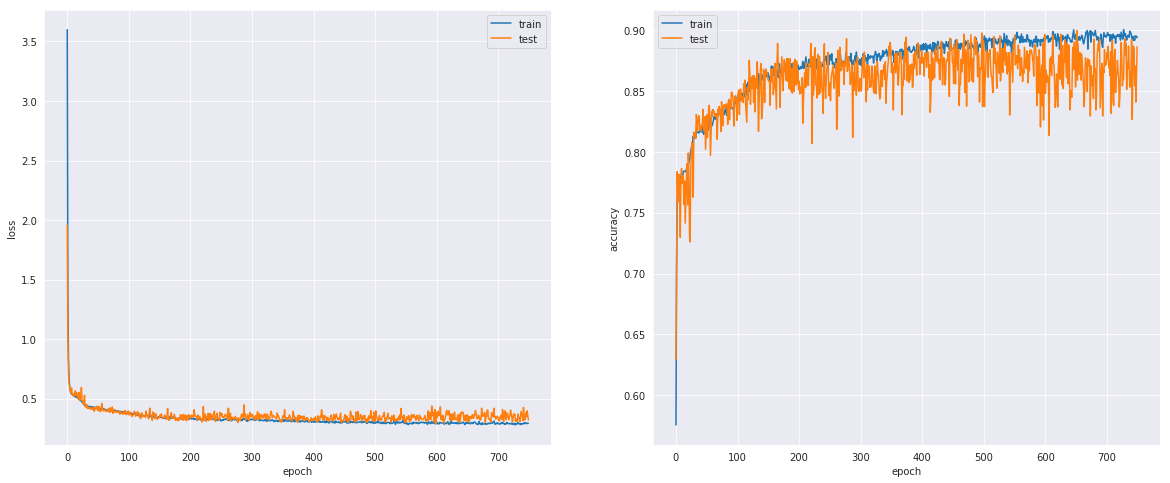

In [422]:
show_results(model,log,df_test_x.values,df_test_y.values,256)

In [64]:
df_train_x = df_train.drop("Is_Ohnolog",axis=1)
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop("Is_Ohnolog",axis=1)
df_val_y = df_val["Is_Ohnolog"]

model = flat_model(df_train_x,"Flat_complete")

In [65]:
df_test_x = df_test.drop("Is_Ohnolog",axis=1)
df_test_y = df_test["Is_Ohnolog"]

In [66]:
model = flat_model(df_train_x,"Flat_complete")

In [67]:
reset_weights(model)

In [68]:
log = fit_model(df_train_x,df_train_y,df_val_x,df_val_y,model,500,Adamax(),256)

step: 25/500 ...  - loss: 0.8002 - acc: 0.6932 - recall: 0.7156 - val_loss: 0.6972 - val_acc: 0.6870 - val_recall: 0.6173


step: 50/500 ...  - loss: 0.5858 - acc: 0.7256 - recall: 0.7648 - val_loss: 0.5919 - val_acc: 0.7209 - val_recall: 0.7300


step: 75/500 ...  - loss: 0.5617 - acc: 0.7420 - recall: 0.7880 - val_loss: 0.5808 - val_acc: 0.7268 - val_recall: 0.7161


step: 100/500 ...  - loss: 0.5474 - acc: 0.7511 - recall: 0.7981 - val_loss: 0.5767 - val_acc: 0.7319 - val_recall: 0.7223


step: 125/500 ...  - loss: 0.5383 - acc: 0.7573 - recall: 0.8060 - val_loss: 0.5649 - val_acc: 0.7372 - val_recall: 0.7506


step: 150/500 ...  - loss: 0.5300 - acc: 0.7623 - recall: 0.8104 - val_loss: 0.5662 - val_acc: 0.7358 - val_recall: 0.7277


step: 175/500 ...  - loss: 0.5227 - acc: 0.7682 - recall: 0.8185 - val_loss: 0.5672 - val_acc: 0.7382 - val_recall: 0.7207


step: 200/500 ...  - loss: 0.5168 - acc: 0.7712 - recall: 0.8240 - val_loss: 0.5672 - val_acc: 0.7394 - val_recall: 0.7226


ste

Loss     = 0.5649
Accuracy = 0.7456


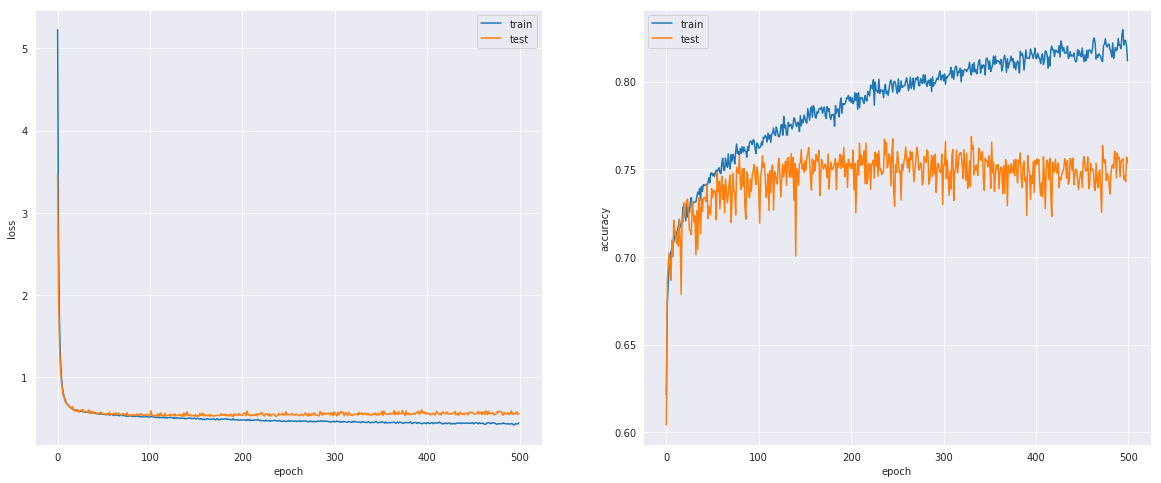

In [82]:
show_results(model,log,df_test_x.values,df_test_y.values,256)

In [341]:
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_complete_diferential["Length_Diff"].values.reshape(-1,1))
df_complete_diferential["Length_Diff"] = x_scaled
df_complete_diferential.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99,Is_Ohnolog,Cosine_Similarity,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,GC_Diff,Length_Diff,Same_Chromosome,Same_Biotype
0,0,1,0,0,0,-110.262220,-64.244058,-17.732310,21.116198,-14.999834,-43.711734,63.060082,-87.305164,97.941028,39.457050,-50.490842,-11.014814,23.018523,-113.438610,-55.007650,0.759527,5.193945,-92.415721,-93.250570,-105.537193,44.639493,34.963324,-32.231126,39.001671,55.356249,10.489772,6.756338,-13.414777,-31.564254,-2.423727,95.889064,-22.249666,-33.723598,-57.332966,-4.495406,91.367591,-43.725705,-11.502453,52.343955,70.735994,82.349639,-45.634225,-31.039460,-64.533723,-5.856059,91.297145,40.707912,-50.461167,7.542859,-64.714941,-103.317336,40.946048,-77.383320,-69.753901,103.836665,-27.859148,-69.168

## Diferential Completed

In [68]:
#df_complete_diferential.to_pickle(train_filepath + working_level + "/datasets/dataset_diferential-" + str(kmer_chosen) + "-" + type_chosen + ".pkl")

In [342]:
from sklearn.metrics.pairwise import cosine_similarity
kmers_List = [3,8]
emb_type_List = ["cdna2"]
for curr_kmer in kmers_List:
    for cur_emb_type in emb_type_List:      
        emb_dict = get_embeddings(curr_kmer,cur_emb_type)
        for dataName in dataList:
            curr_df = emb_dict[dataName]
            cosine_similarity_list = []
            for i in range(0,len(curr_df[0].values)):    
                cosine_similarity_list.append(cosine_similarity([curr_df[0].values[i]], [curr_df[1].values[i]])[0][0])            
            df_save = pd.DataFrame()
            df_save["Cosine_Similarity"] = cosine_similarity_list      
            if(cur_emb_type == ""):
                cur_emb_type = "normal"
            df_save.to_pickle(train_filepath + working_level + "/cosine_similarity/" + dataName + "-" + cur_emb_type + "-" + str(curr_kmer) + ".pkl")                            

In [343]:
df_train,df_val,df_test = get_train_val_test(df_complete_diferential)

In [344]:
df_train_x = df_train.drop("Is_Ohnolog",axis=1)
df_train_x = df_train_x.drop(embedding_1_cols,axis=1)
df_train_x = df_train_x.drop(embedding_2_cols,axis=1)
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop("Is_Ohnolog",axis=1)
df_val_x = df_val_x.drop(embedding_1_cols,axis=1)
df_val_x = df_val_x.drop(embedding_2_cols,axis=1)
df_val_y = df_val["Is_Ohnolog"]

df_test_x = df_test.drop("Is_Ohnolog",axis=1)
df_test_x = df_test_x.drop(embedding_1_cols,axis=1)
df_test_x = df_test_x.drop(embedding_2_cols,axis=1)
df_test_y = df_test["Is_Ohnolog"]

In [345]:
model = flat_model(df_train_x,"Flat_diff_meta_only")

In [346]:
reset_weights(model)

In [347]:
log = fit_model(df_train_x,df_train_y,df_val_x,df_val_y,model,500,Adamax(),256)

step: 25/500 ...  - loss: 0.6568 - acc: 0.7888 - recall: 0.7790 - val_loss: 0.5859 - val_acc: 0.7849 - val_recall: 0.7604


step: 50/500 ...  - loss: 0.4481 - acc: 0.8122 - recall: 0.7899 - val_loss: 0.4589 - val_acc: 0.8082 - val_recall: 0.7799


step: 75/500 ...  - loss: 0.4320 - acc: 0.8182 - recall: 0.7984 - val_loss: 0.4423 - val_acc: 0.8139 - val_recall: 0.7842


step: 100/500 ...  - loss: 0.4218 - acc: 0.8224 - recall: 0.8055 - val_loss: 0.4377 - val_acc: 0.8155 - val_recall: 0.7993


step: 125/500 ...  - loss: 0.4170 - acc: 0.8245 - recall: 0.8084 - val_loss: 0.4276 - val_acc: 0.8196 - val_recall: 0.8056


step: 150/500 ...  - loss: 0.4130 - acc: 0.8259 - recall: 0.8118 - val_loss: 0.4245 - val_acc: 0.8203 - val_recall: 0.8046


step: 175/500 ...  - loss: 0.4089 - acc: 0.8277 - recall: 0.8125 - val_loss: 0.4263 - val_acc: 0.8208 - val_recall: 0.8173


step: 200/500 ...  - loss: 0.4034 - acc: 0.8307 - recall: 0.8142 - val_loss: 0.4215 - val_acc: 0.8224 - val_recall: 0.8121


ste

Loss     = 0.3185
Accuracy = 0.8840


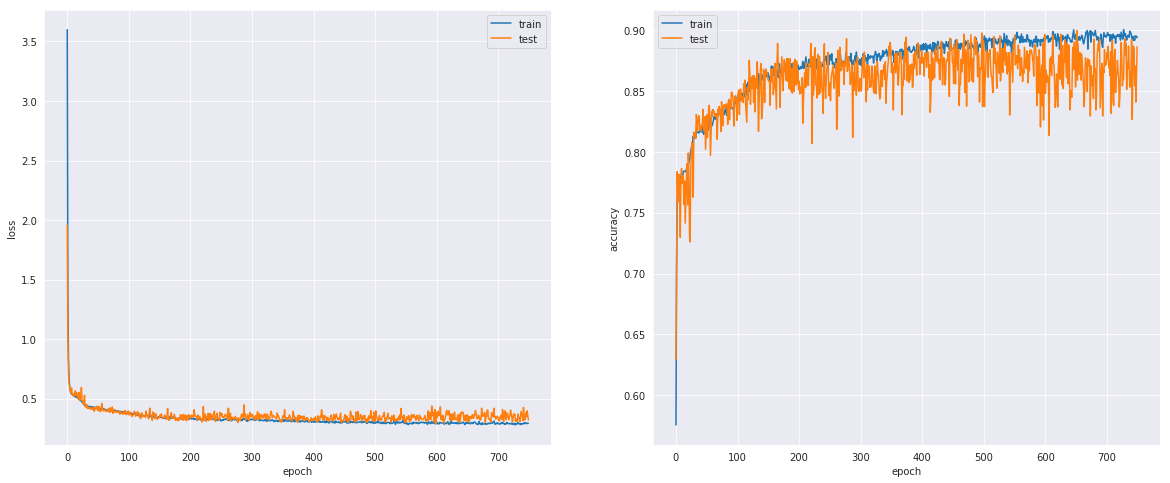

In [421]:
show_results(model,log,df_test_x.values,df_test_y.values,256)

In [124]:
df_train_x = df_train.drop("Is_Ohnolog",axis=1)
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop("Is_Ohnolog",axis=1)
df_val_y = df_val["Is_Ohnolog"]

df_test_x = df_test.drop("Is_Ohnolog",axis=1)
df_test_y = df_test["Is_Ohnolog"]

In [125]:
model = flat_model(df_train_x,"Flat_diff_complete")

In [126]:
reset_weights(model)

In [127]:
log = fit_model(df_train_x,df_train_y,df_val_x,df_val_y,model,400,Adamax(),256)

step: 25/400 ...  - loss: 0.8906 - acc: 0.7069 - recall: 0.7245 - val_loss: 0.7782 - val_acc: 0.7079 - val_recall: 0.7139


step: 50/400 ...  - loss: 0.5718 - acc: 0.7335 - recall: 0.7478 - val_loss: 0.5849 - val_acc: 0.7196 - val_recall: 0.7187


step: 75/400 ...  - loss: 0.5499 - acc: 0.7453 - recall: 0.7658 - val_loss: 0.5669 - val_acc: 0.7262 - val_recall: 0.6879


step: 100/400 ...  - loss: 0.5331 - acc: 0.7550 - recall: 0.7735 - val_loss: 0.5611 - val_acc: 0.7280 - val_recall: 0.6694


step: 125/400 ...  - loss: 0.5207 - acc: 0.7620 - recall: 0.7807 - val_loss: 0.5537 - val_acc: 0.7360 - val_recall: 0.6848


step: 150/400 ...  - loss: 0.5098 - acc: 0.7701 - recall: 0.7884 - val_loss: 0.5536 - val_acc: 0.7381 - val_recall: 0.6863


step: 175/400 ...  - loss: 0.5003 - acc: 0.7765 - recall: 0.7988 - val_loss: 0.5652 - val_acc: 0.7357 - val_recall: 0.6725


step: 200/400 ...  - loss: 0.4920 - acc: 0.7824 - recall: 0.8115 - val_loss: 0.5552 - val_acc: 0.7424 - val_recall: 0.6942


ste

Loss     = 0.5920
Accuracy = 0.7341


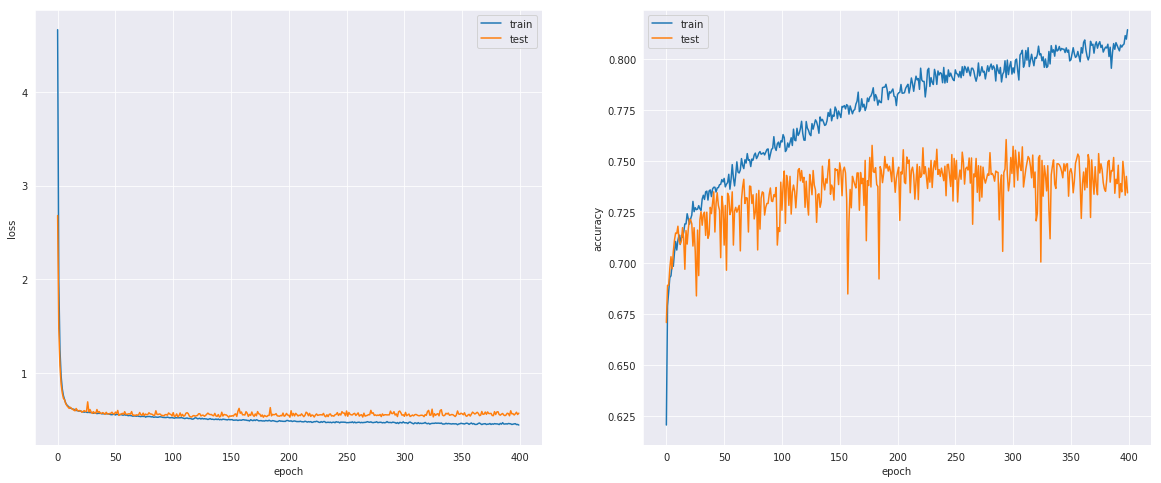

In [128]:
show_results(model,log,df_test_x.values,df_test_y.values,256)

## Levels

In [580]:
def show_results_level(model, log,x_test,x_emb_test,y_test,bs,metrics_used):
    metrics_names,metrics = (model.metrics_names,model.evaluate([x_emb_test.values,x_test.values],[y_test.values,y_test.values], batch_size=bs,verbose=False))
    count = 0
    for i in range(0,len(metrics)):
        print(f'{metrics_names[i]}     = {metrics[i]:.4f}')                
    nr_metrics = len(metrics_used)
    fig, axes = plt.subplots(2, nr_metrics, figsize=(18,8))   
    
    i = 0
    for metric in metrics_used:
        match_metrics = [model_metric.split('_')[0] for model_metric in metrics_names if metric in model_metric]
        print(match_metrics)
        if(metric == "loss"):
            match_metrics.remove("loss")
        for match in match_metrics:        
            if(i>=nr_metrics):
                axes[1][i-nr_metrics].plot(log.history[match + "_" + metric], label="Train")            
                axes[1][i-nr_metrics].plot(log.history["val_" + match + "_" + metric], label="Val")       
                axes[1][i-nr_metrics].set_xlabel('epoch'); 
                axes[1][i-nr_metrics].set_ylabel(metric + "_" + match)                            
            else:
                axes[0][i].plot(log.history[match + "_" + metric], label="Train")            
                axes[0][i].plot(log.history["val_" + match + "_" + metric], label="Val")       
                axes[0][i].set_xlabel('epoch'); 
                axes[0][i].set_ylabel(metric + "_" + match)                            
                
            i += 1            
    for ax in axes:
        for a in ax:
             a.legend()

In [570]:
def show_results_level_RNN(model, log,x_test,x_emb_test,y_test,bs,metrics_used):
    metrics_names,metrics = (model.metrics_names,model.evaluate([x_emb_test.values.reshape(x_emb_test.shape[0],x_emb_test.shape[1],1),x_test.values],[y_test.values,y_test.values], batch_size=bs,verbose=False))
    count = 0
    for i in range(0,len(metrics)):
        print(f'{metrics_names[i]}     = {metrics[i]:.4f}')                
    nr_metrics = len(metrics_used)
    fig, axes = plt.subplots(2, nr_metrics, figsize=(18,8))   
    
    i = 0
    for metric in metrics_used:
        match_metrics = [model_metric.split('_')[0] for model_metric in metrics_names if metric in model_metric]
        print(match_metrics)
        if(metric == "loss"):
            match_metrics.remove("loss")
        for match in match_metrics:        
            if(i>=nr_metrics):
                axes[1][i-nr_metrics].plot(log.history[match + "_" + metric], label="Test")            
                axes[1][i-nr_metrics].plot(log.history["val_" + match + "_" + metric], label="Val")       
                axes[1][i-nr_metrics].set_xlabel('epoch'); 
                axes[1][i-nr_metrics].set_ylabel(metric)                            
            else:
                axes[0][i].plot(log.history[match + "_" + metric], label="Test")            
                axes[0][i].plot(log.history["val_" + match + "_" + metric], label="Val")       
                axes[0][i].set_xlabel('epoch'); 
                axes[0][i].set_ylabel(metric)                            
                
            i += 1            
    for ax in axes:
        for a in ax:
             a.legend()

In [569]:
def level_model(df_meta_input,df_embeddings,name):
    
    input_embedding = Input(shape=(len(df_embeddings.columns),), name='embedding_input')        
    emb_x = Dense(512, activation='relu',use_bias=False,kernel_regularizer=regularizers.l2(0.01))(input_embedding)    
    emb_x = BatchNormalization()(emb_x)
    emb_x = Dropout(0.4)(emb_x)
    emb_x = Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01))(emb_x)
    emb_x = Dropout(0.4)(emb_x)
    emb_x = Dense(256, activation='relu',use_bias = False,kernel_regularizer=regularizers.l2(0.01))(emb_x)    
    emb_x = Dropout(0.3)(emb_x)
    emb_x = BatchNormalization()(emb_x)
    emb_x = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01))(emb_x)
    emb_x = Dropout(0.3)(emb_x)
    emb_x = Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01))(emb_x)    
    emb_x = Dropout(0.3)(emb_x)
    emb_x = Dense(32, activation='relu',use_bias = False)(emb_x)
    emb_x = BatchNormalization()(emb_x)
    emb_x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01))(emb_x)        
    emb_x_out = Dense(1, activation='sigmoid',name="aux")(emb_x)
    
    
    meta_input = Input(shape=(len(df_meta_input.columns),), name='meta_input')
    x = keras.layers.concatenate([emb_x, meta_input])
    x = Dense(128, activation='relu',use_bias=False)(x)    
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu',use_bias=False,kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu',use_bias=False,kernel_regularizer=regularizers.l2(0.001))(x)   
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu',use_bias=False,kernel_regularizer=regularizers.l2(0.001))(x)    
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.0005))(x)    
    x = Dropout(0.1)(x)
    x = Dense(8, activation='relu',use_bias=False,kernel_regularizer=regularizers.l2(0.0005))(x)
    x = BatchNormalization()(x)
    predictions = Dense(1, activation='sigmoid',name="main")(x)

    # This creates a model that includes
    # the Input layer and three Dense layers                       
    model_created = Model(inputs=[input_embedding, meta_input], outputs=[emb_x_out,predictions])
    model_created.Name = name
    return model_created

In [575]:
def fit_model_level(train_x,train_emb_x,train_y,val_x,val_emb_x,val_y,model_train,n_epochs,optimizer,batchsize,loss_weigths,verb):
    tensorboard = TensorBoard(log_dir=train_filepath + working_level + "/board_logs/{}".format(time()))
    checkpoint = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-check-{{epoch:02d}}.hdf5".format(model.Name), period = int(n_epochs/5))
    best_model_save = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-best.hdf5".format(model.Name), monitor='val_acc', save_best_only=True, mode='max')
    logger = EpochLogger(display=25)

    model_train.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy',km.binary_recall()],loss_weights=loss_weigths)
    size = len(train_emb_x)
    return model_train.fit([train_emb_x,train_x], y= [train_y,train_y],verbose = verb,validation_data=([val_emb_x,val_x],[val_y,val_y]),epochs = n_epochs,batch_size=batchsize,callbacks = [tensorboard,checkpoint,best_model_save,logger])  # starts training

In [565]:
df_train_x = df_train.drop("Is_Ohnolog",axis=1)
df_train_x = df_train_x.drop(embedding_1_cols,axis=1)
df_train_x = df_train_x.drop(embedding_2_cols,axis=1)

df_train_emb_x = pd.concat([df_train[embedding_1_cols],df_train[embedding_2_cols]],axis=1,sort=False)
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop("Is_Ohnolog",axis=1)
df_val_x = df_val_x.drop(embedding_1_cols,axis=1)
df_val_x = df_val_x.drop(embedding_2_cols,axis=1)

df_val_emb_x = pd.concat([df_val[embedding_1_cols],df_val[embedding_2_cols]],axis=1,sort=False)
df_val_y = df_val["Is_Ohnolog"]

df_test_x = df_test.drop("Is_Ohnolog",axis=1)
df_test_x = df_test_x.drop(embedding_1_cols,axis=1)
df_test_x = df_test_x.drop(embedding_2_cols,axis=1)

df_test_emb_x =  pd.concat([df_test[embedding_1_cols],df_test[embedding_2_cols]],axis=1,sort=False)
df_test_y = df_test["Is_Ohnolog"]

In [567]:
df_train_x.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Percent Identical Matches_High,Aligment Length_High,Nr Mismatch_High,Nr Gap Open_High,Evalue_High,Bit Score_High,Percent Identical Matches_Medium,Aligment Length_Medium,Nr Mismatch_Medium,Nr Gap Open_Medium,Evalue_Medium,Bit Score_Medium,Percent Identical Matches_Low,Aligment Length_Low,Nr Mismatch_Low,Nr Gap Open_Low,Evalue_Low,Bit Score_Low,Percent Identical Matches_Total,Aligment Length_Total,Nr Mismatch_Total,Nr Gap Open_Total,Evalue_Total,Bit Score_Total,Nr Hits,Seq-1-Biotype_protein_coding,Cosine_Similarity,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding
7615,0,0,0,0,1,0.604777,0.025372,19,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977914,0.176786,0.013158,0.031250,0.575255,0.704805,0.977914,0.005325,0.000611,0.002717,0.605640,0.005220,0.003922,1,0.890094,0.449091,0.225426,18,1
7544,0,0,0,0,1,0.476779,0.142072,8,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.971156,0.200000,0.019737,0.031250,0.267602,0.781352,0.971156,0.006024,0.000917,0.002717,0.281737,0.005787,0.003922,1,0.718253,0.632302,0.019681,1,1
1777,0,1,0,0,0,0.619618,0.020596,19,0.0,0.0,0.0,0.0,0.0,0.0,0.71795,0.091051,0.098802,0.000000,0.032222,0.182011,0.936457,0.246429,0.078947,0.062500,0.177270,0.742671,0.892756,0.016007,0.019071,0.004348,0.149313,0.006060,0.002451,0,0.815250,0.416231,0.100851,1,1
8491,0,0,1,0,0,0.525242,0.053667,12,0.0,0.0,0.0,0.0,0.0,0.0,0.76533,0.163202,0.141146,0.142857,0.158731,0.402494,0.955746,0.218367,0.037594,0.035714,0.230146,0.797115,0.892274,0.034464,0.039586,0.052795,0.161586,0.010053,0.010294,1,0.975577,0.588026,0.198652,9,1
976,0,1,0,0,0,0.355671,0.035413,21,0.0,0.0,0.0,0.0,0.0,0.0,0.84000,0.038911,0.023952,0.000000,0.000004,0.259788,0.969553,0.193088,0.022071,0.048387,0.594470,0.728591,0.965504,0.006306,0.001605,0.004076,0.606312,0.005598,0.015686,0,0.987982,0.369464,0.220851,6,1


In [566]:
df_train_emb_x.head()

,Embedding1_0,Embedding1_1,Embedding1_2,Embedding1_3,Embedding1_4,Embedding1_5,Embedding1_6,Embedding1_7,Embedding1_8,Embedding1_9,Embedding1_10,Embedding1_11,Embedding1_12,Embedding1_13,Embedding1_14,Embedding1_15,Embedding1_16,Embedding1_17,Embedding1_18,Embedding1_19,Embedding1_20,Embedding1_21,Embedding1_22,Embedding1_23,Embedding1_24,Embedding1_25,Embedding1_26,Embedding1_27,Embedding1_28,Embedding1_29,Embedding1_30,Embedding1_31,Embedding1_32,Embedding1_33,Embedding1_34,Embedding1_35,Embedding1_36,Embedding1_37,Embedding1_38,Embedding1_39,Embedding1_40,Embedding1_41,Embedding1_42,Embedding1_43,Embedding1_44,Embedding1_45,Embedding1_46,Embedding1_47,Embedding1_48,Embedding1_49,Embedding1_50,Embedding1_51,Embedding1_52,Embedding1_53,Embedding1_54,Embedding1_55,Embedding1_56,Embedding1_57,Embedding1_58,Embedding1_59,Embedding1_60,Embedding1_61,Embedding1_62,Embedding1_63,Embedding1_64,Embedding1_65,Embedding1_66,Embedding1_67,Embedding1_68,Embedding1_69,Embedding1_70,Embedding1_71,Embedding1_72,Embedding1_73,Embedding1_74,Embedding1_75,Embedding1_76,Embedding1_77,Embedding1_78,Embedding1_79,Embedding1_80,Embedding1_81,Embedding1_82,Embedding1_83,Embedding1_84,Embedding1_85,Embedding1_86,Embedding1_87,Embedding1_88,Embedding1_89,Embedding1_90,Embedding1_91,Embedding1_92,Embedding1_93,Embedding1_94,Embedding1_95,Embedding1_96,Embedding1_97,Embedding1_98,Embedding1_99,Embedding2_0,Embedding2_1,Embedding2_2,Embedding2_3,Embedding2_4,Embedding2_5,Embedding2_6,Embedding2_7,Embedding2_8,Embedding2_9,Embedding2_10,Embedding2_11,Embedding2_12,Embedding2_13,Embedding2_14,Embedding2_15,Embedding2_16,Embedding2_17,Embedding2_18,Embedding2_19,Embedding2_20,Embedding2_21,Embedding2_22,Embedding2_23,Embedding2_24,Embedding2_25,Embedding2_26,Embedding2_27,Embedding2_28,Embedding2_29,Embedding2_30,Embedding2_31,Embedding2_32,Embedding2_33,Embedding2_34,Embedding2_35,Embedding2_36,Embedding2_37,Embedding2_38,Embedding2_39,Embedding2_40,Embedding2_41,Embedding2_42,Embedding2_43,Embedding2_44,Embedding2_45,Embedding2_46,Embedding2_47,Embedding2_48,Embedding2_49,Embedding2_50,Embedding2_51,Embedding2_52,Embedding2_53,Embedding2_54,Embedding2_55,Embedding2_56,Embedding2_57,Embedding2_58,Embedding2_59,Embedding2_60,Embedding2_61,Embedding2_62,Embedding2_63,Embedding2_64,Embedding2_65,Embedding2_66,Embedding2_67,Embedding2_68,Embedding2_69,Embedding2_70,Embedding2_71,Embedding2_72,Embedding2_73,Embedding2_74,Embedding2_75,Embedding2_76,Embedding2_77,Embedding2_78,Embedding2_79,Embedding2_80,Embedding2_81,Embedding2_82,Embedding2_83,Embedding2_84,Embedding2_85,Embedding2_86,Embedding2_87,Embedding2_88,Embedding2_89,Embedding2_90,Embedding2_91,Embedding2_92,Embedding2_93,Embedding2_94,Embedding2_95,Embedding2_96,Embedding2_97,Embedding2_98,Embedding2_99
7615,43.540190,-43.970921,15.505301,10.229770,30.820905,-41.202480,80.335369,35.261934,62.981536,-58.434405,70.800979,-39.916742,25.121269,18.143727,-45.402110,73.424242,-14.578587,-22.170558,-61.490659,31.237258,-12.650183,72.824274,6.767173,-16.773495,7.544119,-0.333355,-19.215467,-15.650342,46.310387,-17.966786,43.972041,-9.167710,-38.102372,-50.433131,12.410808,-32.952846,-68.816457,-50.776663,79.026130,62.628775,89.763214,24.751878,-7.016631,-79.722481,-23.024633,10.039177,48.434961,10.266422,70.202348,74.163462,-65.863069,-93.902296,-59.651181,-55.544598,21.910384,-64.747957,-39.042086,-15.624926,4.450969,-108.769072,46.515088,-19.850741,-69.718333,105.278463,-112.565658,-25.431866,-18.361647,24.600482,5.469939,-17.118444,1.926534,22.421440,18.758871,-12.177459,-48.503542,-41.508424,-48.614562,-25.368296,-33.254691,-87.501718,-58.795389,-41.337854,-4.186734,88.711894,5.041883,50.078210,2.282630,59.283916,22.298367,29.922826,21.127158,1.227425,-102.060957,-9.795559,-92.230657,4.605679,-123.651456,-4.219131,13.144106,-99.858842,67.080130,-190.854300,-1.124153,-27.012567,-11.725477,-216.906217,177.267005,86.136816,175.810619,-60.307792,116.613713,-78.162812,76.902597,-16.272783,-137.340708,129.401

In [584]:
model = level_model(df_train_x,df_train_emb_x,"Level_model")

In [585]:
reset_weights(model)

In [586]:
log = fit_model_level(df_train_x,df_train_emb_x,df_train_y,df_val_x,df_val_emb_x,df_val_y,model,1500,Adamax(),256,[0.2,1],0)

/home/jboffi/anaconda3/envs/thesis3/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


step: 25/1500 ...  - loss: 3.3633 - val_loss: 3.0615
 - main_loss: 0.5443 - main_acc: 0.7203 - main_recall: 0.6778 - val_main_loss: 0.5144 - val_main_acc: 0.7472 - val_main_recall: 0.6739
 - aux_loss: 0.6273 - aux_acc: 0.6444 - aux_recall: 0.6769 - val_aux_loss: 0.6293 - val_aux_acc: 0.6509 - val_aux_recall: 0.6706
step: 50/1500 ...  - loss: 0.6040 - val_loss: 0.5878
 - main_loss: 0.3732 - main_acc: 0.8344 - main_recall: 0.7513 - val_main_loss: 0.3611 - val_main_acc: 0.8440 - val_main_recall: 0.7925
 - aux_loss: 0.6048 - aux_acc: 0.6669 - aux_recall: 0.7504 - val_aux_loss: 0.5987 - val_aux_acc: 0.6730 - val_aux_recall: 0.7895
step: 75/1500 ...  - loss: 0.4968 - val_loss: 0.4808
 - main_loss: 0.3133 - main_acc: 0.8621 - main_recall: 0.7853 - val_main_loss: 0.2990 - val_main_acc: 0.8690 - val_main_recall: 0.8203
 - aux_loss: 0.6029 - aux_acc: 0.6731 - aux_recall: 0.7842 - val_aux_loss: 0.5964 - val_aux_acc: 0.6793 - val_aux_recall: 0.8173
step: 100/1500 ...  - loss: 0.4659 - val_loss: 0.

loss     = 0.3472
aux_loss     = 0.5754
main_loss     = 0.2101
aux_acc     = 0.7027
aux_recall     = 0.8356
main_acc     = 0.9146
main_recall     = 0.8385
['loss', 'aux', 'main']
['aux', 'main']
['aux', 'main']


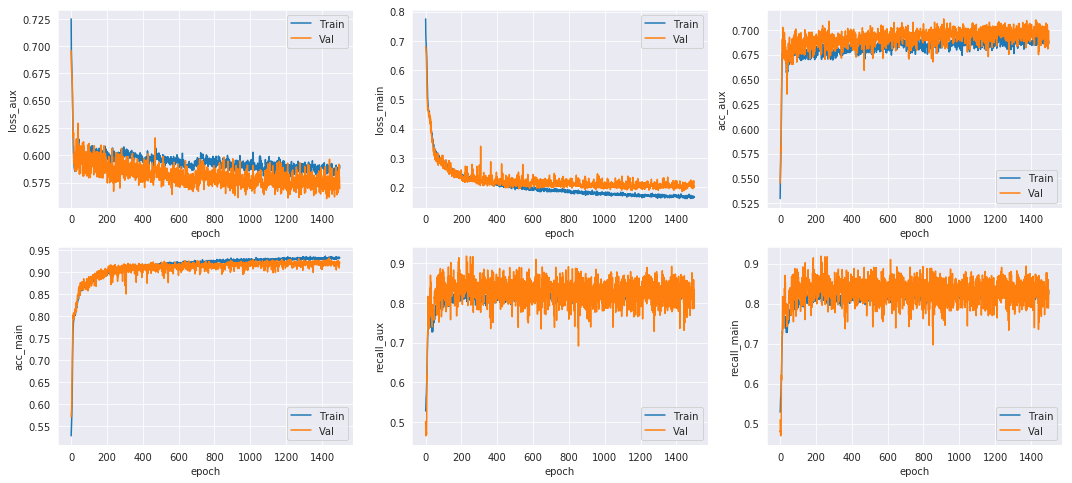

In [587]:
show_results_level(model,log,df_test_x,df_test_emb_x,df_test_y,256,["loss","acc","recall"])

In [75]:
def level_model_rnn(df_meta_input,df_embeddings,name,rnn_size,bs):
    input_embedding = Input(shape=(len(df_embeddings.columns),1), name='embedding_input')
        
    emb_x = GRU(rnn_size, activation='relu',kernel_regularizer=regularizers.l2(0.01))(input_embedding)    
    emb_x_out = Dense(1, activation='sigmoid',name="aux")(emb_x)
    
    
    meta_input = Input(shape=(len(df_meta_input.columns),), name='meta_input')
    x = keras.layers.concatenate([emb_x, meta_input])
    x = Dense(128, activation='relu')(x)    
    x = Dense(128, activation='relu')(x)    
    x = Dense(64, activation='relu')(x)    
    x = Dense(64, activation='relu')(x)    
    x = Dense(32, activation='relu')(x)    
    x = Dense(16, activation='relu')(x)    
    x = Dense(8, activation='relu')(x)

    predictions = Dense(1, activation='sigmoid',name="main")(x)

    # This creates a model that includes
    # the Input layer and three Dense layers                       
    model_created = Model(inputs=[input_embedding, meta_input], outputs=[emb_x_out,predictions])
    model_created.Name = name
    return model_created

In [94]:
model = level_model_rnn(df_train_x,df_train_emb_x,"Level_model_RNN",128,128)

In [95]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    (None, 200, 1)       0                                            
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, 128)          49920       embedding_input[0][0]            
__________________________________________________________________________________________________
meta_input (InputLayer)         (None, 14)           0                                            
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 142)          0           gru_2[0][0]                      
                                                                 meta_input[0][0]                 
__________

In [84]:
df_train_x.head()

,Specie_Dog,Specie_Human,Specie_Mouse,Specie_Pig,Specie_Rat,Sequence-1 GC,Sequence-1 Length,Sequence-1-Chromosome,Seq-1-Biotype_protein_coding,Cosine_Similarity,Sequence-2 GC,Sequence-2 Length,Sequence-2-Chromosome,Seq-2-Biotype_protein_coding
7615,0,0,0,0,1,0.604777,0.025372,19,1,0.890094,0.449091,0.225426,18,1
7544,0,0,0,0,1,0.476779,0.142072,8,1,0.718253,0.632302,0.019681,1,1
1777,0,1,0,0,0,0.619618,0.020596,19,0,0.815250,0.416231,0.100851,1,1
8491,0,0,1,0,0,0.525242,0.053667,12,1,0.975577,0.588026,0.198652,9,1
976,0,1,0,0,0,0.355671,0.035413,21,0,0.987982,0.369464,0.220851,6,1


In [ ]:
log = fit_model_level(df_train_x,df_train_emb_x.values.reshape(df_train_emb_x.shape[0],df_train_emb_x.shape[1],1),df_train_y,df_val_x,df_val_emb_x.values.reshape(df_val_emb_x.shape[0],df_val_emb_x.shape[1],1),df_val_y,model,1500,Adagrad(),128,[0.2,1])

In [ ]:
show_results_level_RNN(model,log,df_test_x,df_test_emb_x,df_test_y,256,["loss","acc","recall"])

In [146]:
def level_model_conv(df_meta_input,df_embeddings,name,bs):    
    input_embedding = Input(shape=(len(df_embeddings.columns),len(df_embeddings.columns),1), name='embedding_input')        
    emb_x = Conv2D(64,5, activation='relu')(input_embedding)    
    emb_x = MaxPool2D()(emb_x)
    emb_x = Conv2D(32,4, activation='relu')(emb_x)    
    emb_x = Conv2D(16,3, activation='relu')(emb_x)                
    emb_x = Flatten()(emb_x)
    emb_x_out = Dense(1, activation='sigmoid',name="aux")(emb_x)
        
    meta_input = Input(shape=(len(df_meta_input.columns),), name='meta_input')
    x = keras.layers.concatenate([emb_x, meta_input])    
    x = Dense(128, activation='relu')(x)    
    x = Dense(64, activation='relu')(x)        
    x = Dense(32, activation='relu')(x)    
    x = Dense(16, activation='relu')(x)    
    x = Dense(8, activation='relu')(x)

    predictions = Dense(1, activation='sigmoid',name="main")(x)

    # This creates a model that includes
    # the Input layer and three Dense layers                       
    model_created = Model(inputs=[input_embedding, meta_input], outputs=[emb_x_out,predictions])
    model_created.Name = name
    return model_created

In [147]:
model = level_model_conv(df_train_x,df_train_emb_x[embedding_1_cols],"Level_model_Conv",256)

In [148]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    (None, 100, 100, 1)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 96, 96, 64)   1664        embedding_input[0][0]            
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 48, 48, 64)   0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 45, 45, 32)   32800       max_pooling2d_8[0][0]            
__________________________________________________________________________________________________
conv2d_23 

In [ ]:
log = fit_model_level(df_train_x.values,matrix_train,df_train_y.values,df_val_x.values,matrix_test,df_val_y.values,model,500,Adamax(),128,[0.2,1])

## Siames

In [200]:
df_train,df_val,df_test = get_train_val_test(dataset_diferential)

In [232]:
import keras.backend as K
from keras.layers import Lambda

def get_tensor_embedding_layer(input_embedding):
    emb_x = Dense(256, activation='relu')(input_embedding)            
    emb_x = Dense(256, activation='relu')(emb_x)        
    emb_x = Dense(128, activation='relu')(emb_x)        
    emb_x = Dense(64, activation='relu')(emb_x)        
    emb_x = Dense(32, activation='relu')(emb_x)          
    emb_x_out = Dense(1, activation='sigmoid')(emb_x)
    
    return emb_x,emb_x_out

def level_siames(df_meta_input,df_embeddings_1,df_embeddings_2,name,bs):    
    
    input_embedding_1 = Input(shape=(len(df_embeddings_1.columns),), name='embedding_input_1')        
    input_embedding_2 = Input(shape=(len(df_embeddings_2.columns),), name='embedding_input_2')        
    
    emb_x_1,emb_x_out_1 = get_tensor_embedding_layer(input_embedding_1)    
    emb_x_2,emb_x_out_2 = get_tensor_embedding_layer(input_embedding_2)    
        
    
    meta_input = Input(shape=(len(df_meta_input.columns),), name='meta_input')
    x = keras.layers.concatenate([emb_x_out_1,meta_input,emb_x_out_2])
    x = Dense(128, activation='relu')(x)        
    x = Dense(128, activation='relu')(x)            
    x = Dense(64, activation='relu')(x)        
    x = Dense(32, activation='relu')(x)       
    x = Dense(32, activation='relu')(x)       
    x = Dense(16, activation='relu')(x)        
    x = Dense(8, activation='relu')(x)    
    predictions = Dense(1, activation='sigmoid',name="main")(x)
        
    model_created = Model(inputs=[input_embedding_1,input_embedding_2,meta_input], outputs=[predictions])
    model_created.Name = name
    return model_created


In [233]:
import keras.backend as K
from keras.layers import Lambda

def get_tensor_embedding_layer(input_embedding):
    emb_x = Dense(256, activation='relu')(input_embedding)            
    emb_x = Dense(256, activation='relu')(emb_x)        
    emb_x = Dense(128, activation='relu')(emb_x)        
    emb_x = Dense(64, activation='relu',)(emb_x)        
    emb_x = Dense(32, activation='relu',)(emb_x)          
    emb_x_out = Dense(1, activation='sigmoid')(emb_x)
    
    return emb_x,emb_x_out

def level_siames_merge_layer(df_meta_input,df_embeddings_1,df_embeddings_2,name,bs):    
    
    input_embedding_1 = Input(shape=(len(df_embeddings_1.columns),), name='embedding_input_1')        
    input_embedding_2 = Input(shape=(len(df_embeddings_2.columns),), name='embedding_input_2')        
    
    emb_x_1,emb_x_out_1 = get_tensor_embedding_layer(input_embedding_1)    
    emb_x_2,emb_x_out_2 = get_tensor_embedding_layer(input_embedding_2)    
    
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([emb_x_out_1, emb_x_out_2])
    
    meta_input = Input(shape=(len(df_meta_input.columns),), name='meta_input')
    
    x = keras.layers.concatenate([L1_distance,meta_input])
    x = Dense(128, activation='relu')(x)        
    x = Dense(128, activation='relu')(x)            
    x = Dense(64, activation='relu')(x)    
    x = Dense(32, activation='relu')(x)       
    x = Dense(32, activation='relu')(x)       
    x = Dense(16, activation='relu')(x)        
    x = Dense(8, activation='relu')(x)    
    predictions = Dense(1, activation='sigmoid',name="main")(x)
        
    model_created = Model(inputs=[input_embedding_1,input_embedding_2,meta_input], outputs=[predictions])
    model_created.Name = name
    return model_created



In [234]:
def fit_model_siames(train_x,train_emb_x_1,train_emb_x_2,train_y,val_x,val_emb_x_1,val_emb_x_2,val_y,model_train,n_epochs,optimizer,batchsize,loss_weigths,verb):
    tensorboard = TensorBoard(log_dir=train_filepath + working_level + "/board_logs/{}".format(time()))
    checkpoint = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-check-{{epoch:02d}}.hdf5".format(model.Name), period = int(n_epochs/5))
    best_model_save = ModelCheckpoint(train_filepath + working_level + "/model_checkpoints/{0}-best.hdf5".format(model.Name), monitor='val_acc', save_best_only=True, mode='max')
    logger = EpochLogger(display=25)

    model_train.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy',km.binary_recall()],loss_weights=loss_weigths)    
    return model_train.fit([train_emb_x_1,train_emb_x_2,train_x], y= [train_y],verbose = verb,validation_data=([val_emb_x_1,val_emb_x_2,val_x],[val_y]),epochs = n_epochs,batch_size=batchsize,callbacks = [tensorboard,checkpoint,best_model_save,logger])  # starts training

In [235]:
df_train_x = df_train.drop("Is_Ohnolog",axis=1)
df_train_x = df_train_x.drop(embedding_1_cols,axis=1)
df_train_x = df_train_x.drop(embedding_2_cols,axis=1)

df_train_emb_x_1 = df_train[embedding_1_cols]
df_train_emb_x_2 = df_train[embedding_2_cols]
df_train_y = df_train["Is_Ohnolog"]

df_val_x = df_val.drop("Is_Ohnolog",axis=1)
df_val_x = df_val_x.drop(embedding_1_cols,axis=1)
df_val_x = df_val_x.drop(embedding_2_cols,axis=1)

df_val_emb_x_1 = df_val[embedding_1_cols]
df_val_emb_x_2 = df_val[embedding_2_cols]                  
df_val_y = df_val["Is_Ohnolog"]

df_test_x = df_test.drop("Is_Ohnolog",axis=1)
df_test_x = df_test_x.drop(embedding_1_cols,axis=1)
df_test_x = df_test_x.drop(embedding_2_cols,axis=1)

df_test_emb_x_1 =  df_test[embedding_1_cols]
df_test_emb_x_2 =  df_test[embedding_2_cols]
df_test_y = df_test["Is_Ohnolog"]

In [238]:
model = level_siames_merge_layer(df_train_x,df_train_emb_x_1,df_train_emb_x_2,"Level_Siames",128)

In [239]:
log = fit_model_siames(df_train_x.values,df_train_emb_x_1.values,df_train_emb_x_2.values,df_train_y.values,df_val_x.values,df_val_emb_x_1.values,df_val_emb_x_2.values,df_val_y.values,model,500,Adamax(),128,[1],0)

step: 25/500 ...  - loss: 0.6386 - acc: 0.6275 - recall: 0.6849 - val_loss: 0.6401 - val_acc: 0.6333 - val_recall: 0.6708


step: 50/500 ...  - loss: 0.6008 - acc: 0.6695 - recall: 0.7380 - val_loss: 0.6033 - val_acc: 0.6693 - val_recall: 0.7662


step: 75/500 ...  - loss: 0.5811 - acc: 0.6874 - recall: 0.7451 - val_loss: 0.5859 - val_acc: 0.6870 - val_recall: 0.7033


step: 100/500 ...  - loss: 0.5728 - acc: 0.6946 - recall: 0.7502 - val_loss: 0.5794 - val_acc: 0.6922 - val_recall: 0.7500


step: 125/500 ...  - loss: 0.5639 - acc: 0.7016 - recall: 0.7566 - val_loss: 0.5716 - val_acc: 0.7012 - val_recall: 0.7426


step: 150/500 ...  - loss: 0.5594 - acc: 0.7042 - recall: 0.7599 - val_loss: 0.5721 - val_acc: 0.7004 - val_recall: 0.7453


step: 175/500 ...  - loss: 0.5563 - acc: 0.7064 - recall: 0.7624 - val_loss: 0.5723 - val_acc: 0.7024 - val_recall: 0.7401


step: 200/500 ...  - loss: 0.5529 - acc: 0.7089 - recall: 0.7615 - val_loss: 0.5784 - val_acc: 0.7003 - val_recall: 0.7398


ste